# Regresión Lineal Múltiple

Usaremos el dataset trees (incluido en R).  Tiene mediciones para 31 cerezos negros:

*   Girth: circunferencia del tronco (pulgadas)
*   Height: Altura (pies)
*   Volume: Volumen (pies cúbicos)



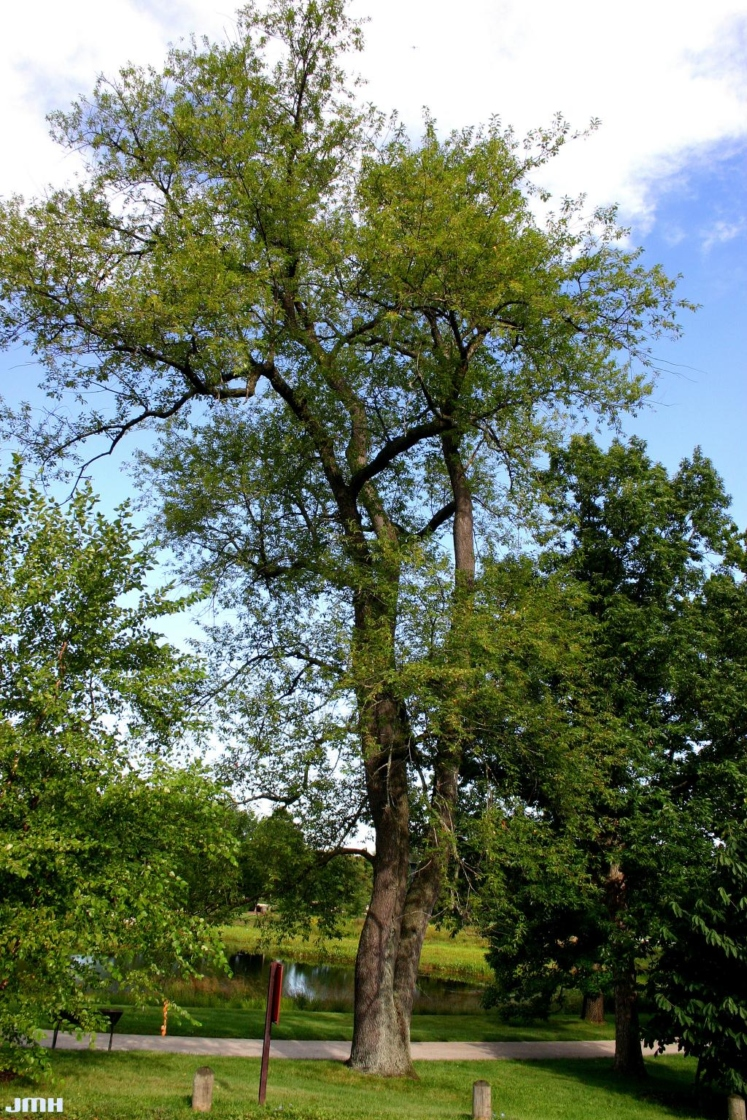

In [ ]:
install.packages('nlstools')
install.packages('GGally')
library(nlstools)
library(GGally)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’



'nlstools' has been loaded.


IMPORTANT NOTICE: Most nonlinear regression models and data set examples

related to predictive microbiolgy have been moved to the package 'nlsMicrobio'


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to fo

In [ ]:
# Cargue del dataset
data(trees)
head(trees)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


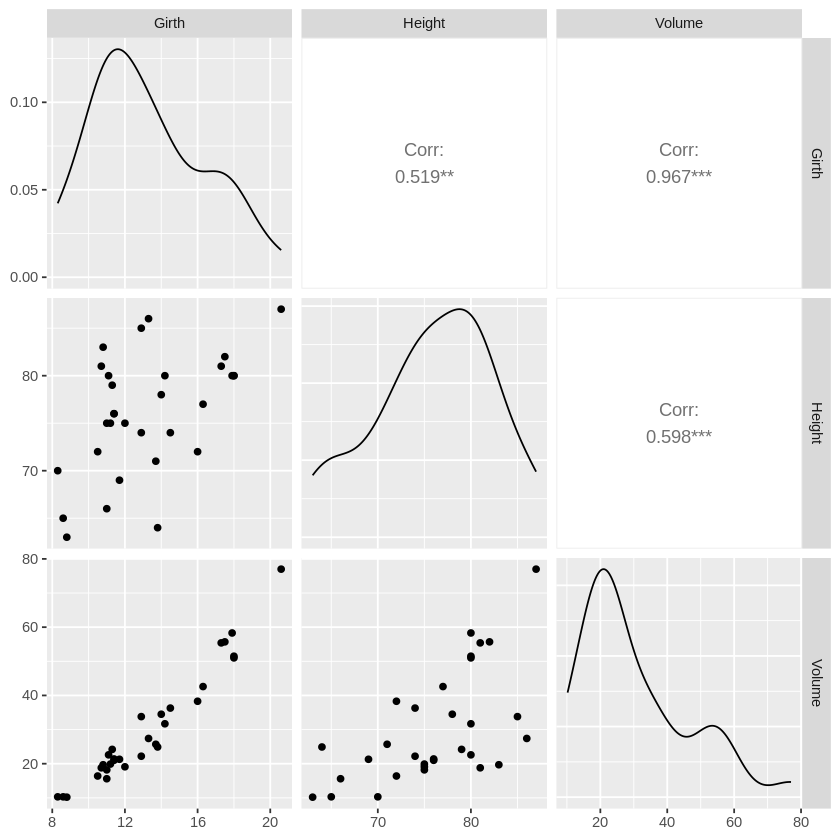

In [ ]:
trees %>%
  select(Girth, Height, Volume) %>%
  ggpairs(columnLabels = c("Girth", "Height", "Volume"))

In [ ]:
# Regresión Lineal: Volume ~ a*Girth + b*Height + c

modeloRL<- lm(Volume ~., data=trees)
summary(modeloRL)


Call:
lm(formula = Volume ~ ., data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


In [ ]:
# Regresión no lineal: Volume ~ a * Girth^b * Height^c
nls_model_trees <- nls(
  Volume ~ a * Girth^b * Height^c,
  data = trees,
  start = list(a = 0.5, b = 2, c = 1)  # starting values
)

# Show the model summary
summary(nls_model_trees)


Formula: Volume ~ a * Girth^b * Height^c

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.001449   0.001367   1.060 0.298264    
b 1.996921   0.082077  24.330  < 2e-16 ***
c 1.087647   0.242159   4.491 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.533 on 28 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 6.707e-07


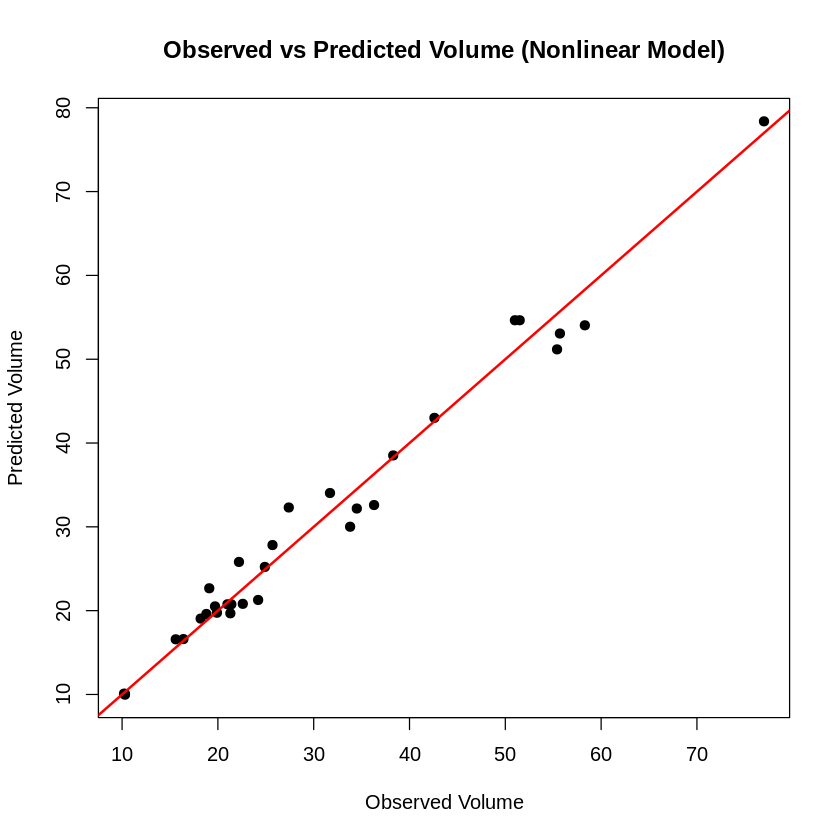

In [ ]:
# Predicción de valores ajustados
trees$Volume_pred <- predict(nls_model_trees)

# Gráfica
plot(trees$Volume, trees$Volume_pred,
     xlab = "Observed Volume", ylab = "Predicted Volume",
     main = "Observed vs Predicted Volume (Nonlinear Model)",
     pch = 19)
abline(0, 1, col = "red", lwd = 2)

In [ ]:
# Suma de cuadrados de los residuos
RSS <- sum(residuals(nls_model_trees)^2)

# Suma total de cuadrados
TSS <- sum((trees$Volume - mean(trees$Volume))^2)

# Pseudo-R2
R2 <- 1 - RSS/TSS
cat("R-squared:", R2, "\n")

R-squared: 0.9778364 


# Linearización del modelo no lineal

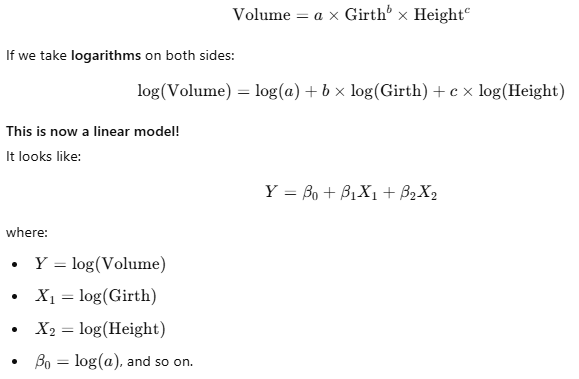

In [ ]:
# Create log-transformed variables
trees$logVolume <- log(trees$Volume)
trees$logGirth <- log(trees$Girth)
trees$logHeight <- log(trees$Height)

# Fit linear model
lm_model <- lm(logVolume ~ logGirth + logHeight, data = trees)

# Summary (includes R-squared!)
summary(lm_model)


Call:
lm(formula = logVolume ~ logGirth + logHeight, data = trees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.168561 -0.048488  0.002431  0.063637  0.129223 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.63162    0.79979  -8.292 5.06e-09 ***
logGirth     1.98265    0.07501  26.432  < 2e-16 ***
logHeight    1.11712    0.20444   5.464 7.81e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08139 on 28 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9761 
F-statistic: 613.2 on 2 and 28 DF,  p-value: < 2.2e-16
